## N-Body Problem

### Two-body problem

Simple case. Two bodies, only considering the gravitaional interaction between them.
The equations of motion are:

$$ \vec{F} = -\frac{Gm_1m_2}{r^3}\vec{r} $$

$$ m_1\frac{d^{2}{\vec{r}}}{dt^{2}} = -\frac{Gm_1m_2}{r^3}\vec{r} $$

Then:
$$ \ddot{\vec{r}} = -\frac{G m_2}{r^3}\vec{r} $$

Reescaling:
- $t' = t \cdot \sqrt{\frac{G M_s}{C^3}}$
- $r' = r \cdot \frac{1}{C}$ 
- $m' = m \cdot \frac{1}{M_s}$

where $M_s$ is the mass of the more massive body and $C$ is the average distance between the masses.
(For example, mass of the Sun and Astronomical Unit)

Separating the equations of motion in the $x'$ and $y'$ components and reducing the second order differential equation to two first order differential equations:
- $ \dot{x'} = v'_x $
- $ \dot{y'} = v'_y $
- $ \dot{v'}_x = - \frac{m'_2}{r'^3}x $
- $ \dot{v'}_y = - \frac{m'_2}{r'^3}y $

In [19]:
import numpy as np
import matplotlib.pyplot as plt

In [9]:
# Some constants:
G = 6.67408e-11 # Gravitational constant
M = 1.989e30 	# Mass of the Sun
C = 1.496e11 	# Astronomical unit
V = 29_800 		# Average speed of the Earth around the Sun

In [10]:
# Sacaling factors:
f_t = np.sqrt(G*M/C**3) 	# Time scale factor
f_r = 1/C					# Length scale factor
f_v = f_r/f_t 				# Velocity scale factor
f_m = M 					# Mass scale factor

# Time step:
h = 1E-2
t = 0

# Initial conditions:
x0, y0, vx0, vy0 = 1, 0, 0, V*f_v
r0 = np.array([x0, y0])
v0 = np.array([vx0, vy0])
m = 1

## Using Vervelts Algorithm:

1. Choose h, the step size; $t=0$ and initial conditions.
1. Evaluate $a_i(t)$ from the gravitational interactions.
1. Calculate $r_i(t+h)$ and $w_i$, where $w_i = v_i(t) + \frac{h}{2} a_i(t)$
1. Evaluate $a_i(t+h)$ from the new positions, $r_i(t+h)$.
1. Calculate $v_i(t+h)$ where $v_i(t+h) = w_i + \frac{h}{2} a_i(t+h)$
1. $t = t + h$
1. Repeat from step 2.

In [11]:
def accelaration(r1, r2, m2):
    return np.array([-m2*(r1[0]-r2[0])/np.linalg.norm(r1-r2)**3, -m2*(r1[1]-r2[1])/np.linalg.norm(r1-r2)**3], dtype=np.float64)

In [12]:
def w_aux(v, a, h):
	return v + a*h/2

In [13]:
def r_new(r, v, h):
	return r + v*h

In [14]:
def v_new(v, w, a, h):
	return w + a*h/2

In [15]:
pos = np.array([r0])

In [16]:
a = accelaration(r0, v0, m)
r = r_new(r0, v0, h)
w = w_aux(v0, a, h)
a = accelaration(r, v0, m)
v = v_new(v0, w, a, h)

for i in range(100_000):
	if i%10000 == 0:
		print(i/10000)
	t += h
	r = r_new(r, v, h)
	w = w_aux(v, a, h)
	a = accelaration(r, v, m)
	v = v_new(v, w, a, h)
	pos = np.append(pos, [r], axis=0)

0.0


1.0
2.0
3.0
4.0
5.0
6.0
7.0
8.0
9.0


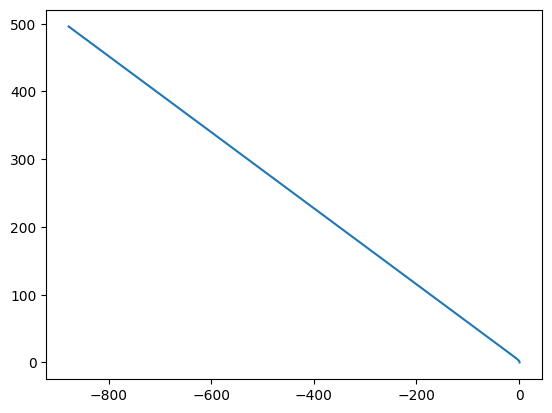

In [20]:
plt.plot(pos[:,0], pos[:,1])